In [1]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [93]:
yf.pdr_override()
df = pdr.get_data_yahoo("CL=F", start="2016-01-01", end="2023-04-06")
#df = pd.DataFrame(data = df, columns=['Open','High', 'Low','Close','Adj Close','Volume'])
if isinstance(df, pd.DataFrame):
    df.head()

[*********************100%***********************]  1 of 1 completed


In [94]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,37.599998,38.389999,36.330002,36.759998,36.759998,431985
2016-01-05,36.900002,37.099998,35.740002,35.970001,35.970001,410131
2016-01-06,36.180000,36.389999,33.770000,33.970001,33.970001,563811
2016-01-07,34.090000,34.259998,32.099998,33.270000,33.270000,617409
2016-01-08,33.299999,34.340000,32.639999,33.160000,33.160000,596496


In [95]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-30,72.980003,74.629997,72.610001,74.370003,74.370003,269743
2023-03-31,74.370003,75.720001,73.769997,75.669998,75.669998,304361
2023-04-03,80.099998,81.690002,79.000000,80.419998,80.419998,547126
2023-04-04,80.440002,81.809998,79.610001,80.709999,80.709999,343570
2023-04-05,81.010002,81.239998,79.720001,80.610001,80.610001,343570


In [96]:
df.shape

(1828, 6)

In [97]:
df1=df.reset_index()['Open']

In [98]:
df1

0       37.599998
1       36.900002
2       36.180000
3       34.090000
4       33.299999
          ...    
1823    72.980003
1824    74.370003
1825    80.099998
1826    80.440002
1827    81.010002
Name: Open, Length: 1828, dtype: float64

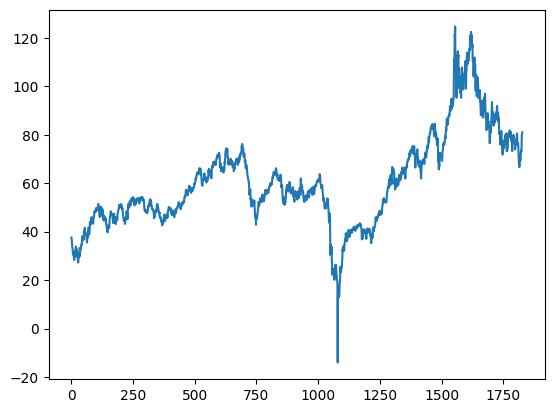

In [99]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [100]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [101]:
import numpy as np

In [102]:
df1

0       37.599998
1       36.900002
2       36.180000
3       34.090000
4       33.299999
          ...    
1823    72.980003
1824    74.370003
1825    80.099998
1826    80.440002
1827    81.010002
Name: Open, Length: 1828, dtype: float64

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
df1

array([[0.37213325],
       [0.36708496],
       [0.36189239],
       ...,
       [0.67863837],
       [0.68109044],
       [0.68520121]])

In [105]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [106]:
training_size,test_size

(1188, 640)

In [107]:
train_data

array([[0.37213325],
       [0.36708496],
       [0.36189239],
       ...,
       [0.39650943],
       [0.3867734 ],
       [0.38771093]])

In [108]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [109]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [110]:
print(X_train.shape), print(y_train.shape)

(1087, 100)
(1087,)


(None, None)

In [111]:
print(X_test.shape), print(ytest.shape)

(539, 100)
(539,)


(None, None)

In [112]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [113]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [114]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 305ms/step - loss: 0.0457 - val_loss: 0.0454
Epoch 2/100
17/17 [==============================] - 4s 236ms/step - loss: 0.0043 - val_loss: 0.0273
Epoch 3/100
17/17 [==============================] - 3s 175ms/step - loss: 0.0022 - val_loss: 0.0161
Epoch 4/100
17/17 [==============================] - 4s 225ms/step - loss: 0.0017 - val_loss: 0.0123
Epoch 5/100
17/17 [==============================] - 3s 186ms/step - loss: 0.0015 - val_loss: 0.0096
Epoch 6/100
17/17 [==============================] - 4s 251ms/step - loss: 0.0013 - val_loss: 0.0073
Epoch 7/100
17/17 [==============================] - 4s 234ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 8/100
17/17 [==============================] - 3s 175ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 9/100
17/17 [==============================] - 4s 230ms/step - loss: 9.6589e-04 - val_loss: 0.0031
Epoch 10/100
17/17 [==============================] - 3s 192ms/step - loss: 9.0692e-04

In [118]:
import tensorflow as tf

In [119]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 57ms/step


In [120]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [121]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

53.297259774122836

In [122]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

81.90556826455624

In [123]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

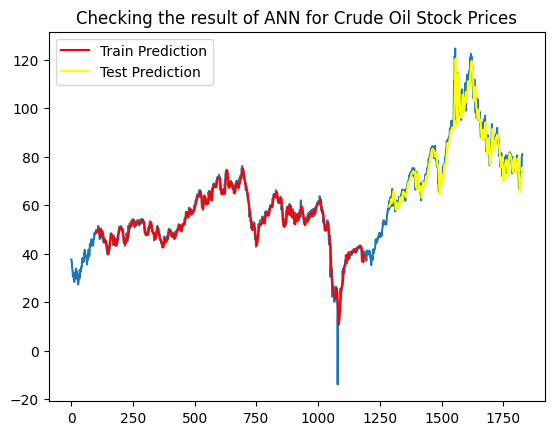

In [124]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Crude Oil Stock Prices")
plt.show()

In [125]:
len(test_data)

640

In [126]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 299)

In [127]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [128]:
temp_input

[0.7316457108674136,
 0.736694063378225,
 0.7381364183685619,
 0.735468056134207,
 0.7514063153733892,
 0.7631616681093518,
 0.7618635266091222,
 0.7490263801192488,
 0.7501081738731595,
 0.7500360396169479,
 0.7782345363632582,
 0.7848694573545139,
 0.7659742988561301,
 0.7565267471180962,
 0.7617913923529105,
 0.7626568383605022,
 0.7625847041042906,
 0.7682099655978472,
 0.7739794956038271,
 0.7860233303423203,
 0.7939563928338056,
 0.8735035305619253,
 0.9038655597937412,
 0.8795614875481198,
 0.9759844097569093,
 0.9712245392486285,
 1.0,
 0.8972306388024855,
 0.8653540653018051,
 0.8900908330400644,
 0.8385979785681477,
 0.7877542223575038,
 0.788547479086568,
 0.8482619330748165,
 0.8591518398031874,
 0.9151882170370659,
 0.8859800607930565,
 0.9265108742803907,
 0.9068945382868384,
 0.9153324305271732,
 0.8471801393209057,
 0.8599451515545675,
 0.8758834107937498,
 0.8310255323354047,
 0.8145823883250569,
 0.8485504150773471,
 0.8310976115693003,
 0.8016731626012878,
 0.8017452

In [129]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=298
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.73669406 0.73813642 0.73546806 0.75140632 0.76316167 0.76186353
 0.74902638 0.75010817 0.75003604 0.77823454 0.78486946 0.7659743
 0.75652675 0.76179139 0.76265684 0.7625847  0.76820997 0.7739795
 0.78602333 0.79395639 0.87350353 0.90386556 0.87956149 0.97598441
 0.97122454 1.         0.89723064 0.86535407 0.89009083 0.83859798
 0.78775422 0.78854748 0.84826193 0.85915184 0.91518822 0.88598006
 0.92651087 0.90689454 0.91533243 0.84718014 0.85994515 0.87588341
 0.83102553 0.81458239 0.84855042 0.83109761 0.80167316 0.80174524
 0.81061588 0.78732147 0.82871773 0.85244478 0.87285443 0.878047
 0.84415116 0.8401846  0.85150726 0.83210727 0.81234672 0.83484782
 0.83737197 0.85944032 0.85100243 0.85879128 0.84739649 0.87682099
 0.88489827 0.89737485 0.8412664  0.814943   0.86275778 0.87011394
 0.90134141 0.92218375 0.92066927 0.8877109  0.90473095 0.89831238
 0.89723064 0.89708637 0.89924996 0.92456363 0.93004468 0.93321793
 0.92889081 0.94872349 0.97230633 0.95990188 0.9648781

2 day output [[0.6812515]]
3 day input [0.75140632 0.76316167 0.76186353 0.74902638 0.75010817 0.75003604
 0.77823454 0.78486946 0.7659743  0.75652675 0.76179139 0.76265684
 0.7625847  0.76820997 0.7739795  0.78602333 0.79395639 0.87350353
 0.90386556 0.87956149 0.97598441 0.97122454 1.         0.89723064
 0.86535407 0.89009083 0.83859798 0.78775422 0.78854748 0.84826193
 0.85915184 0.91518822 0.88598006 0.92651087 0.90689454 0.91533243
 0.84718014 0.85994515 0.87588341 0.83102553 0.81458239 0.84855042
 0.83109761 0.80167316 0.80174524 0.81061588 0.78732147 0.82871773
 0.85244478 0.87285443 0.878047   0.84415116 0.8401846  0.85150726
 0.83210727 0.81234672 0.83484782 0.83737197 0.85944032 0.85100243
 0.85879128 0.84739649 0.87682099 0.88489827 0.89737485 0.8412664
 0.814943   0.86275778 0.87011394 0.90134141 0.92218375 0.92066927
 0.8877109  0.90473095 0.89831238 0.89723064 0.89708637 0.89924996
 0.92456363 0.93004468 0.93321793 0.92889081 0.94872349 0.97230633
 0.95990188 0.9648781  0

6 day output [[0.6682441]]
7 day input [0.75010817 0.75003604 0.77823454 0.78486946 0.7659743  0.75652675
 0.76179139 0.76265684 0.7625847  0.76820997 0.7739795  0.78602333
 0.79395639 0.87350353 0.90386556 0.87956149 0.97598441 0.97122454
 1.         0.89723064 0.86535407 0.89009083 0.83859798 0.78775422
 0.78854748 0.84826193 0.85915184 0.91518822 0.88598006 0.92651087
 0.90689454 0.91533243 0.84718014 0.85994515 0.87588341 0.83102553
 0.81458239 0.84855042 0.83109761 0.80167316 0.80174524 0.81061588
 0.78732147 0.82871773 0.85244478 0.87285443 0.878047   0.84415116
 0.8401846  0.85150726 0.83210727 0.81234672 0.83484782 0.83737197
 0.85944032 0.85100243 0.85879128 0.84739649 0.87682099 0.88489827
 0.89737485 0.8412664  0.814943   0.86275778 0.87011394 0.90134141
 0.92218375 0.92066927 0.8877109  0.90473095 0.89831238 0.89723064
 0.89708637 0.89924996 0.92456363 0.93004468 0.93321793 0.92889081
 0.94872349 0.97230633 0.95990188 0.9648781  0.98391747 0.97692193
 0.96776287 0.97425352 

11 day output [[0.64618695]]
12 day input [0.75652675 0.76179139 0.76265684 0.7625847  0.76820997 0.7739795
 0.78602333 0.79395639 0.87350353 0.90386556 0.87956149 0.97598441
 0.97122454 1.         0.89723064 0.86535407 0.89009083 0.83859798
 0.78775422 0.78854748 0.84826193 0.85915184 0.91518822 0.88598006
 0.92651087 0.90689454 0.91533243 0.84718014 0.85994515 0.87588341
 0.83102553 0.81458239 0.84855042 0.83109761 0.80167316 0.80174524
 0.81061588 0.78732147 0.82871773 0.85244478 0.87285443 0.878047
 0.84415116 0.8401846  0.85150726 0.83210727 0.81234672 0.83484782
 0.83737197 0.85944032 0.85100243 0.85879128 0.84739649 0.87682099
 0.88489827 0.89737485 0.8412664  0.814943   0.86275778 0.87011394
 0.90134141 0.92218375 0.92066927 0.8877109  0.90473095 0.89831238
 0.89723064 0.89708637 0.89924996 0.92456363 0.93004468 0.93321793
 0.92889081 0.94872349 0.97230633 0.95990188 0.9648781  0.98391747
 0.97692193 0.96776287 0.97425352 0.95968553 0.93740084 0.9453339
 0.89845665 0.89845665 0

16 day output [[0.63484895]]
17 day input [0.7739795  0.78602333 0.79395639 0.87350353 0.90386556 0.87956149
 0.97598441 0.97122454 1.         0.89723064 0.86535407 0.89009083
 0.83859798 0.78775422 0.78854748 0.84826193 0.85915184 0.91518822
 0.88598006 0.92651087 0.90689454 0.91533243 0.84718014 0.85994515
 0.87588341 0.83102553 0.81458239 0.84855042 0.83109761 0.80167316
 0.80174524 0.81061588 0.78732147 0.82871773 0.85244478 0.87285443
 0.878047   0.84415116 0.8401846  0.85150726 0.83210727 0.81234672
 0.83484782 0.83737197 0.85944032 0.85100243 0.85879128 0.84739649
 0.87682099 0.88489827 0.89737485 0.8412664  0.814943   0.86275778
 0.87011394 0.90134141 0.92218375 0.92066927 0.8877109  0.90473095
 0.89831238 0.89723064 0.89708637 0.89924996 0.92456363 0.93004468
 0.93321793 0.92889081 0.94872349 0.97230633 0.95990188 0.9648781
 0.98391747 0.97692193 0.96776287 0.97425352 0.95968553 0.93740084
 0.9453339  0.89845665 0.89845665 0.89095628 0.85403141 0.8509303
 0.87422471 0.89557188

19 day output [[0.6316153]]
20 day input [0.87350353 0.90386556 0.87956149 0.97598441 0.97122454 1.
 0.89723064 0.86535407 0.89009083 0.83859798 0.78775422 0.78854748
 0.84826193 0.85915184 0.91518822 0.88598006 0.92651087 0.90689454
 0.91533243 0.84718014 0.85994515 0.87588341 0.83102553 0.81458239
 0.84855042 0.83109761 0.80167316 0.80174524 0.81061588 0.78732147
 0.82871773 0.85244478 0.87285443 0.878047   0.84415116 0.8401846
 0.85150726 0.83210727 0.81234672 0.83484782 0.83737197 0.85944032
 0.85100243 0.85879128 0.84739649 0.87682099 0.88489827 0.89737485
 0.8412664  0.814943   0.86275778 0.87011394 0.90134141 0.92218375
 0.92066927 0.8877109  0.90473095 0.89831238 0.89723064 0.89708637
 0.89924996 0.92456363 0.93004468 0.93321793 0.92889081 0.94872349
 0.97230633 0.95990188 0.9648781  0.98391747 0.97692193 0.96776287
 0.97425352 0.95968553 0.93740084 0.9453339  0.89845665 0.89845665
 0.89095628 0.85403141 0.8509303  0.87422471 0.89557188 0.90768785
 0.89211015 0.86549833 0.88561

22 day output [[0.6285238]]
23 day input [0.97598441 0.97122454 1.         0.89723064 0.86535407 0.89009083
 0.83859798 0.78775422 0.78854748 0.84826193 0.85915184 0.91518822
 0.88598006 0.92651087 0.90689454 0.91533243 0.84718014 0.85994515
 0.87588341 0.83102553 0.81458239 0.84855042 0.83109761 0.80167316
 0.80174524 0.81061588 0.78732147 0.82871773 0.85244478 0.87285443
 0.878047   0.84415116 0.8401846  0.85150726 0.83210727 0.81234672
 0.83484782 0.83737197 0.85944032 0.85100243 0.85879128 0.84739649
 0.87682099 0.88489827 0.89737485 0.8412664  0.814943   0.86275778
 0.87011394 0.90134141 0.92218375 0.92066927 0.8877109  0.90473095
 0.89831238 0.89723064 0.89708637 0.89924996 0.92456363 0.93004468
 0.93321793 0.92889081 0.94872349 0.97230633 0.95990188 0.9648781
 0.98391747 0.97692193 0.96776287 0.97425352 0.95968553 0.93740084
 0.9453339  0.89845665 0.89845665 0.89095628 0.85403141 0.8509303
 0.87422471 0.89557188 0.90768785 0.89211015 0.86549833 0.8856195
 0.82475117 0.80931774 0

25 day output [[0.62410843]]
26 day input [0.89723064 0.86535407 0.89009083 0.83859798 0.78775422 0.78854748
 0.84826193 0.85915184 0.91518822 0.88598006 0.92651087 0.90689454
 0.91533243 0.84718014 0.85994515 0.87588341 0.83102553 0.81458239
 0.84855042 0.83109761 0.80167316 0.80174524 0.81061588 0.78732147
 0.82871773 0.85244478 0.87285443 0.878047   0.84415116 0.8401846
 0.85150726 0.83210727 0.81234672 0.83484782 0.83737197 0.85944032
 0.85100243 0.85879128 0.84739649 0.87682099 0.88489827 0.89737485
 0.8412664  0.814943   0.86275778 0.87011394 0.90134141 0.92218375
 0.92066927 0.8877109  0.90473095 0.89831238 0.89723064 0.89708637
 0.89924996 0.92456363 0.93004468 0.93321793 0.92889081 0.94872349
 0.97230633 0.95990188 0.9648781  0.98391747 0.97692193 0.96776287
 0.97425352 0.95968553 0.93740084 0.9453339  0.89845665 0.89845665
 0.89095628 0.85403141 0.8509303  0.87422471 0.89557188 0.90768785
 0.89211015 0.86549833 0.8856195  0.82475117 0.80931774 0.83816528
 0.85669983 0.8471080

28 day output [[0.6179496]]
29 day input [0.83859798 0.78775422 0.78854748 0.84826193 0.85915184 0.91518822
 0.88598006 0.92651087 0.90689454 0.91533243 0.84718014 0.85994515
 0.87588341 0.83102553 0.81458239 0.84855042 0.83109761 0.80167316
 0.80174524 0.81061588 0.78732147 0.82871773 0.85244478 0.87285443
 0.878047   0.84415116 0.8401846  0.85150726 0.83210727 0.81234672
 0.83484782 0.83737197 0.85944032 0.85100243 0.85879128 0.84739649
 0.87682099 0.88489827 0.89737485 0.8412664  0.814943   0.86275778
 0.87011394 0.90134141 0.92218375 0.92066927 0.8877109  0.90473095
 0.89831238 0.89723064 0.89708637 0.89924996 0.92456363 0.93004468
 0.93321793 0.92889081 0.94872349 0.97230633 0.95990188 0.9648781
 0.98391747 0.97692193 0.96776287 0.97425352 0.95968553 0.93740084
 0.9453339  0.89845665 0.89845665 0.89095628 0.85403141 0.8509303
 0.87422471 0.89557188 0.90768785 0.89211015 0.86549833 0.8856195
 0.82475117 0.80931774 0.83816528 0.85669983 0.84710801 0.79251404
 0.79741812 0.79611998 0

In [130]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [131]:
import matplotlib.pyplot as plt

In [132]:
len(df1)

1828

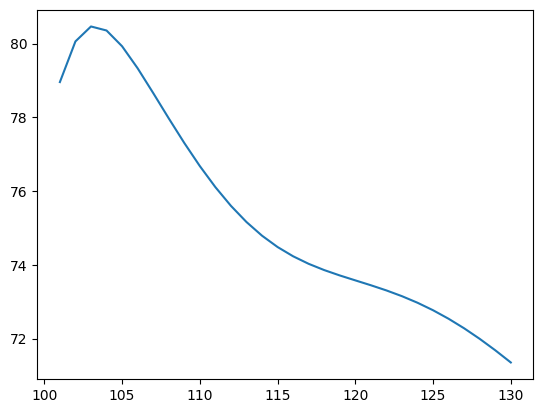

In [133]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [134]:
df1

array([[0.37213325],
       [0.36708496],
       [0.36189239],
       ...,
       [0.67863837],
       [0.68109044],
       [0.68520121]])

In [135]:
scaler.inverse_transform(lst_output)

array([[78.95523986],
       [80.0576789 ],
       [80.46233907],
       [80.35327703],
       [79.92612013],
       [79.32927076],
       [78.65873261],
       [77.97232608],
       [77.30482936],
       [76.67832596],
       [76.10716353],
       [75.60028455],
       [75.16168919],
       [74.79091462],
       [74.4837458 ],
       [74.23272789],
       [74.02815805],
       [73.85891188],
       [73.71330298],
       [73.57977719],
       [73.44754071],
       [73.3072378 ],
       [73.1511161 ],
       [72.97327456],
       [72.76986178],
       [72.53887771],
       [72.28004132],
       [71.99460887],
       [71.68489449],
       [71.35412145]])

In [136]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

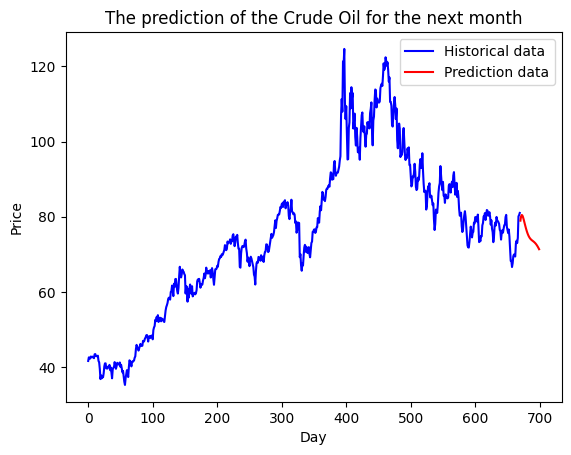

In [137]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("The prediction of the Crude Oil for the next month")

# show the plot
plt.show()